# Linearna regresija (boston dataset)

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [12]:
# ucitavanje boston skupa podataka
boston=datasets.load_boston()

In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
boston.target
boston.feature_names
#boston.data

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
#napravimo DataFrame sa podacima zbog vizualnosti
boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
#dodavanje Target kolone
boston_df["Target"]=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
X=boston.data
y=boston.target

In [28]:
boston_df.info() # nema nedostajucih podataa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Target     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [29]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


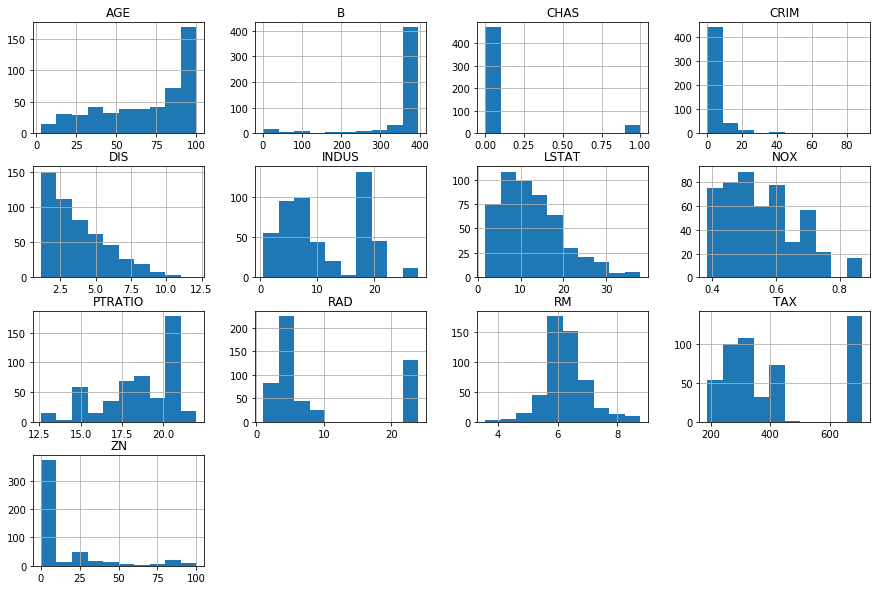

In [60]:
#Plotovanje istograma za nase atribute(Festures)
boston_df.loc[:,boston.feature_names].hist(figsize=(15,10));

In [108]:
# Podelimo nase podatke na trening i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [109]:
#Koristeci scaler iz skleanr
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
X_train=scaler.transform(X_train)

In [111]:
# koristimo scaler koji je istreniram na X_train sajtu # sta ako istreniramo scaler koristimona sve ostalo
X_test=scaler.transform(X_test)

In [112]:
# kreiramo i fitujmo model 
model=LinearRegression().fit(X_train,y_train)

In [113]:
#Skaliranje 
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
m=(X_train-mean)/std

In [114]:
# poredjenje dve matrice
np.allclose(m,X_train)

True

In [115]:
model.intercept_

22.64306784660771

<center>
$h_{\theta}(x)=\theta_{0}+\theta_{1} \cdot X_{1}+....+\theta_{13}\cdot X_{13}$ </br>
$ X=\begin{bmatrix} 1 \\ CRIM \\ ZN \\ INDUS \\ CHAS \\ ... \\ LSTSAT \end{bmatrix}$
</center>

In [116]:
model.coef_

array([-0.79129843,  0.59375512,  0.06452405,  0.67704967, -1.7735717 ,
        3.87004163, -0.39432929, -2.74056081,  2.29194963, -1.87437931,
       -2.11390203,  0.82701598, -2.83315022])

In [117]:
for feature_name, coef in zip(boston.feature_names, list(model.coef_)):
    print(feature_name ,coef)

CRIM -0.7912984250357147
ZN 0.593755121784219
INDUS 0.06452405315141418
CHAS 0.67704967394954
NOX -1.7735716984784213
RM 3.8700416325737295
AGE -0.3943292943884533
DIS -2.7405608088072033
RAD 2.29194962646441
TAX -1.8743793117587235
PTRATIO -2.1139020294298034
B 0.8270159811724088
LSTAT -2.833150217729716


In [118]:
model.score(X_test,y_test)

0.6663089606572566